# **StockBoard**
- [x] Link Dash with colab
- [x] Make simple UI and test it
- [x] Upload your trading Data
- [x] Add visualizations and charts


# Import Libraries

In [41]:
import StockData as sd 
import StockBoard as sb
# from alpha_vantage.timeseries import TimeSeries 
import pickle 
import pandas as pd
import os
import numpy as np

In [42]:
# import pandasql as ps

In [43]:
a = sd.StockData(username="alvin369",location="../profiles")
a.load()
stock = sb.StockBoard(a)

## Get your current balance

In [44]:
stock.getCurrBalance()

53431.05

In [74]:
def getBuyValue(df,stockName,count_val):
    df = df[df.Name == stockName].sort_values('Date',ascending=False)
    val = 0
    for i in range(len(df)):
        c = min(count_val,df.iloc[i].NumberOfStocks)
        val += df.iloc[i].BuyingPrice*c
        count_val -= c
        if count_val <= 0:
            break
    return val

getBuyValue(a.Buy,'VI',600)

7120.0

In [75]:
ch = stock.getCurrHoldings()
portfolioValue = 0
for i in range(len(ch)):
    name = ch.iloc[i]['Name']
    count_val = ch.iloc[i]['current']
    portfolioValue += getBuyValue(a.Buy,name,count_val)

In [76]:
portfolioValue

74163.35

In [65]:
a.Buy.head(3)

,Name,NumberOfStocks,BuyingPrice,Date,TotalCost,ExtraCharges,BrokerageCost
0,LEMONTREE,50,44.5,2021-06-04,2228.24,0.0,3.24
1,NAVNETEDUL,100,87.5,2021-06-04,8760.43,0.0,10.43
2,BANKBARODA,50,82.3,2021-06-03,4120.17,0.0,5.17


In [68]:
a.Buy[a.Buy.Name == 'VI'].sort_values('Date',ascending=False)

,Name,NumberOfStocks,BuyingPrice,Date,TotalCost,ExtraCharges,BrokerageCost
8,VI,200,12.4,2021-02-12,2482.56,0.0,2.56
10,VI,400,11.6,2021-02-02,4646.17,0.0,6.17
30,VI,100,9.7,2020-11-27,971.15,0.0,1.15


In [45]:
stock.getCurrHoldings()

,Name,current
0,BANKBARODA,50
1,BHARTIAIRTEL,10
2,HDFCBANK,2
3,INFY,7
4,IRFC,575
5,LEMONTREE,50
6,NAVNETEDUL,100
7,TATAMOTORS,60
8,VI,600
9,YESBANK,1


In [46]:
a.Invest

,Amount,Date,Description
0,-23.60,2021-06-04,other
1,-94.40,2021-06-03,other
2,-47.20,2021-05-28,other
3,20000.00,2021-05-21,add
4,-23.60,2021-05-20,other
5,-70.80,2021-05-15,other
6,100.00,2021-05-09,Dividend
7,-23.60,2021-05-05,DP Charges
8,-27832.86,2021-04-12,withdraw
9,550.00,2021-03-24,Dividend


In [47]:
stock.getCurrBalance()

53431.05

In [48]:
stock.getInvestedValue()-stock.getCurrBalance()

88180.29

In [55]:
df = a.Sell['NumberOfStocks']*a.Sell['SellingPrice']
sell_val = df.sum()

In [56]:
sell_val

306163.65

In [61]:
def getProfitAmount():
    buy_val = a.Buy.TotalCost.astype(float).sum()
    sell_val = a.Sell.TotalCost.sum()
#     sell_val = df.sum()
    return sell_val-buy_val

In [64]:
stock.getCurrHoldings()

,Name,current
0,BANKBARODA,50
1,BHARTIAIRTEL,10
2,HDFCBANK,2
3,INFY,7
4,IRFC,575
5,LEMONTREE,50
6,NAVNETEDUL,100
7,TATAMOTORS,60
8,VI,600
9,YESBANK,1


In [62]:
getProfitAmount()

-59152.899999999965

In [51]:
# a.Buy.TotalCost.apply(lambda x:float(x))
a.Buy.TotalCost.astype(float).sum()

365059.04

In [25]:
def getSumInvest(df,category):
#     if str(type(category)) == 'list':
    return df[df['Description'].isin(category)].Amount.sum()
#     else:
#         return df[df['Description']== category].Amount.sum()
# getSumInvest(a.Invest,['add','withdraw','Dividend'])
a.Invest[a.Invest['Description'].isin(['add','withdraw','Dividend'])].Amount.sum()
# getSumInvest(a.Invest,'add')+getSumInvest(a.Invest,'withdraw')+getSumInvest(a.Invest,'Dividend')

115061.48

In [25]:
df_invest = a.Invest[['Description','Amount']].groupby('Description').apply(
        lambda c:c.abs().sum()
    )

df_invest.reset_index(inplace=True)
df_invest

,Description,Amount
0,DP Charges,708.00
1,Div,50.00
2,Dividend,1233.00
3,add,177065.34
4,other,70.80
5,withdraw,27832.86


In [6]:
dfBuy = a.Buy
dfSell = a.Sell

d2 = ps.sqldf("""

select a.Name,a.nStocks-coalesce(b.nStocks,0) as current from

(select Name,sum(NumberOfStocks) as nStocks,sum(BuyingPrice*NumberOfStocks) as Value
from dfBuy group by Name 
) a
left outer join 
(select Name,sum(NumberOfStocks) as nStocks,sum(SellingPrice*NumberOfStocks) as Value
from dfSell group by Name) b

on a.Name = b.Name
where a.nStocks > coalesce(b.nStocks,0)
""")
d2

In [46]:
d1 = ps.sqldf("""

select Name,sum(NumberOfStocks) as nStocks,sum(BuyingPrice*NumberOfStocks) as Value
from dfBuy group by Name
""")
d1

,Name,nStocks,Value
0,DISHTV,200,2500.00
1,HDFC,5,5150.00
2,HDFCBANK,10,11064.75
3,INFY,3,2337.00
4,IOLCP,73,56854.36
5,ONGC,10,745.50
6,RELIANCE,10,21250.00
7,SBICARDS,19,14345.00
8,SBIN,26,5499.20
9,YESBANK,1,37.10


In [49]:
d1.diff(d2)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'DataFrame'

In [4]:
from datetime import datetime

In [5]:
# data Structure
sellData = {
    "Name":'test',
    "NumberOfStocks":45,
    "SellingPrice":15,
    "Date":datetime.now().strftime("%Y-%m-%d"),
    "TotalCost":10,
    "ExtraCharges":0,
    }

buyData = {
    "Name":'pank',
    "NumberOfStocks":'23',
    "BuyingPrice":0,
    "Date":datetime.now().strftime("%Y-%m-%d"),
    "TotalCost":24,
    "ExtraCharges":45,
    }

InvestData = {
    "Amount":0,
    "Date":datetime.now(),
    "Description":'add',
    }

In [6]:
# a.addData("sell",**sellData)
a.addData("buy",**buyData)

buy


In [7]:
df = a.getData('sell')

In [7]:
a.Buy

,Name,NumberOfStocks,BuyingPrice,Date,TotalCost,ExtraCharges,BrokerageCost
0,SBIN,3,311,2020-02-03,934.13,0,1.13
1,SBIN,10,198.7,2020-03-26,1987,20,20.00
2,YESBANK,1,37.1,2020-03-05,37.11,0,0.01
3,ONGC,10,74.55,2020-03-09,746.6,0,1.10
4,INFY,3,779,2020-07-08,2339.08,0,2.08
5,SBIN,13,198.4,2020-07-10,2582.3,0,3.10
6,IOLCP,23,770.52,2020-07-21,17743.4,0,21.40
7,SBICARDS,19,755,2020-03-20,14345,0,0.00
8,HDFC,5,1030,2020-07-31,5156.19,0,6.19
9,RELIANCE,10,2125,2020-07-29,21274.1,0,24.12


In [8]:
a.updateData("buy")

buy updated in ../profiles/fahim sucessfully


In [9]:
a.addData("sell",**sellData)

sell


In [10]:
a.Sell

,Name,NumberOfStocks,SellingPrice,Date,TotalCost,ExtraCharges,BrokerageCost
0,SBIN,10,196.5,2020-03-26,1965.00,27.43,27.43
1,INFY,3,932.0,2020-07-16,2792.89,0.00,3.11
2,SBICARDS,19,796.0,2020-07-21,15108.15,0.00,15.85
3,IOLCP,28,796.0,2020-07-29,22312.49,0.00,24.49


In [11]:
a.getData('sell')

,Name,NumberOfStocks,SellingPrice,Date,TotalCost,ExtraCharges,BrokerageCost
3,IOLCP,28,796.0,2020-07-29,22312.49,0.00,24.49
2,SBICARDS,19,796.0,2020-07-21,15108.15,0.00,15.85
1,INFY,3,932.0,2020-07-16,2792.89,0.00,3.11
0,SBIN,10,196.5,2020-03-26,1965.00,27.43,27.43


In [12]:
import os
import pandas as pd 

In [13]:
os.environ['ALPHAVANTAGE_API_KEY'] = "D1RTSKPBB3ZBWOWO" 
apiKey = os.getenv('ALPHAVANTAGE_API_KEY')
print(apiKey)

D1RTSKPBB3ZBWOWO


## AlphaVantage APIs

In [29]:
app = TimeSeries(output_format='pandas')

In [45]:
def saveDataInArchive(dat,name):
    locArchive = './data/archiveData/'
    locData = './data/stockData/'
    with open(locArchive+name+'.pickle', 'wb') as f:
        pickle.dump(dat, f)
    # save csv file data
    df = dat[0]
    df.columns = ['open','high','low','close','adjustedClose','volume','dividendAmt','splitCoeff']
    dat[0].to_csv(locData+name+'.csv')
    

In [68]:

# from alpha_vantage.alphavantage import 


# app.get_intraday('GOOGL') 
li = ['bpcl','cipla','iolcp','sbicards','bajfinance']
for ticker in li:
#     ticker = ''
    print(ticker)
    dat = app.get_daily_adjusted('BSE:'+ticker.upper(), outputsize='compact')
    saveDataInArchive(dat,ticker)

bpcl


KeyError: 'Time Series (Daily)'

In [64]:
dat = app.get_daily_adjusted('BSE:BPCL', outputsize='compact')

In [44]:
saveDataInArchive(infy,'infy')

In [42]:
infy

(            1. open  2. high  3. low  4. close  5. adjusted close  6. volume  \
 date                                                                           
 2020-03-16   640.00   640.00  580.00    582.85           575.0209   927681.0   
 2020-03-17   585.20   592.05  550.10    555.60           548.1370   967841.0   
 2020-03-18   565.20   578.00  528.15    535.05           527.8630   673598.0   
 2020-03-19   530.00   557.70  511.10    545.40           538.0740  2113081.0   
 2020-03-20   554.00   617.00  549.65    584.95           577.0928  1824428.0   
 2020-03-23   548.00   560.00  514.80    526.70           519.6252   724224.0   
 2020-03-24   535.00   605.70  525.55    593.55           585.5772   629411.0   
 2020-03-25   593.00   634.80  566.00    605.95           597.8107   553061.0   
 2020-03-26   615.95   650.50  614.00    646.30           637.6187   497057.0   
 2020-03-27   655.00   675.00  642.80    653.55           644.7713   745637.0   
 2020-03-30   634.00   664.0

In [15]:
d = app.get_intraday('GOOGL')

In [21]:
d[0].columns = ['open','high','low','close','volume']

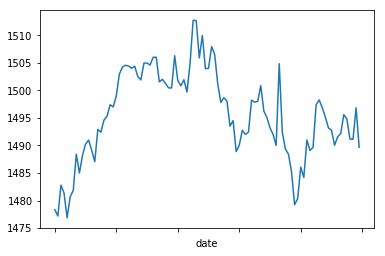

In [27]:
d[0]['close'].plot()

In [46]:
!pip install bsedata

In [56]:
from bsedata.bse import BSE
from pprint import pprint

In [57]:
b = BSE()

In [58]:
pprint(b.topGainers())

[{'LTP': '1,925.60',
  'change': '233.05',
  'pChange': '13.77',
  'scripCode': '532156',
  'securityID': 'VAIBHAVGBL'},
 {'LTP': '503.70',
  'change': '54.00',
  'pChange': '12.01',
  'scripCode': '505355',
  'securityID': 'NESCO'},
 {'LTP': '1,910.55',
  'change': '184.20',
  'pChange': '10.67',
  'scripCode': '509557',
  'securityID': 'GARFIBRES'},
 {'LTP': '98.00',
  'change': '8.90',
  'pChange': '9.99',
  'scripCode': '522275',
  'securityID': 'GET&D'},
 {'LTP': '63.20',
  'change': '5.70',
  'pChange': '9.91',
  'scripCode': '532832',
  'securityID': 'IBREALEST'}]


In [5]:
# Test
#Join Pathname

In [18]:
d = {'name':['pan'],'pow':[34]}

In [19]:
import pandas as pd


In [20]:
df = pd.DataFrame.from_dict(d)

In [21]:
df

,name,pow
0,pan,34


In [22]:
dic = {'name':'kaj','pow':78}

In [26]:
pd.DataFrame(list(dic.items()))

,0,1
0,name,kaj
1,pow,78


In [25]:
# !pip install pnadas

ERROR: Could not find a version that satisfies the requirement pnadas (from versions: none)
ERROR: No matching distribution found for pnadas
